In [55]:
import pickle as pkl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import collections

In [3]:
file = open('idx2word.pkl', 'rb')
vocab = pkl.load(file)
file = open('nerSubsitutions_1.pkl', 'rb')
inputNer = pkl.load(file)
print(vocab[2189])
inputNer[0]

['fine_soft_bread_crumb', 'fine_soft_bread_crumbs', 'breading']


{'id': '013c5d2d28',
 'ingredients': [['carrot', 'carrots'],
  ['water', 'hot_water'],
  ['butter', 'molly_mcbutter'],
  ['sugar'],
  ['salt', 'vegetable_salt', 'low_sodium_salt']],
 'subs': ('carrot', 'yeast')}

In [4]:
val_ranks = pd.read_csv('val_ranks.txt', sep=" ", header=None, names=['ingr', 'subs', 'rank', 'pred'])
test_ranks = pd.read_csv('test_ranks.txt', sep=" ", header=None, names=['ingr', 'subs', 'rank', 'pred'])
test_ranks.head()

,ingr,subs,rank,pred
0,3659,5801,1,5801
1,2189,2189,1,2189
2,2189,2189,1,2189
3,4455,5801,3,2189
4,782,5545,370,2189


In [5]:
val_len = len(val_ranks)
val_top1 = len(val_ranks[val_ranks['rank'] == 1])
val_top3 = len(val_ranks[val_ranks['rank'] < 4])
val_top5 = len(val_ranks[val_ranks['rank'] < 6])
val_top10 = len(val_ranks[val_ranks['rank'] < 10])
print("top1: {:d}/{:d} ({:%})".format(val_top1, val_len, val_top1/val_len))
print("top3: {:d}/{:d} ({:%})".format(val_top3, val_len, val_top3/val_len))
print("top5: {:d}/{:d} ({:%})".format(val_top5, val_len, val_top5/val_len))
print("top10: {:d}/{:d} ({:%})".format(val_top10, val_len, val_top10/val_len))


top1: 856/4765 (17.964323%)
top3: 1407/4765 (29.527807%)
top5: 1759/4765 (36.915005%)
top10: 2228/4765 (46.757608%)


In [6]:
test_len = len(test_ranks)
test_top1 = len(test_ranks[test_ranks['rank'] == 1])
test_top3 = len(test_ranks[test_ranks['rank'] < 4])
test_top5 = len(test_ranks[test_ranks['rank'] < 6])
test_top10 = len(test_ranks[test_ranks['rank'] < 10])
print("top1: {:d}/{:d} ({:%})".format(test_top1, test_len, test_top1/test_len))
print("top3: {:d}/{:d} ({:%})".format(test_top3, test_len, test_top3/test_len))
print("top5: {:d}/{:d} ({:%})".format(test_top5, test_len, test_top5/test_len))
print("top10: {:d}/{:d} ({:%})".format(test_top10, test_len, test_top10/test_len))

top1: 792/4766 (16.617709%)
top3: 1367/4766 (28.682333%)
top5: 1768/4766 (37.096097%)
top10: 2222/4766 (46.621905%)


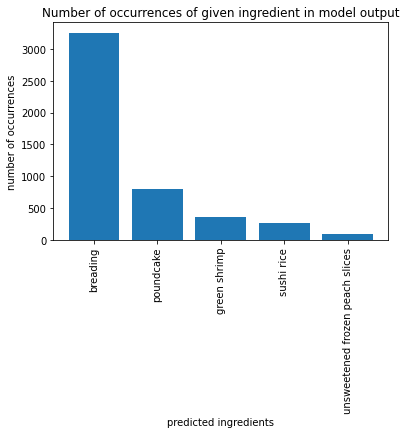

In [78]:
pred_ingr = [vocab[x][-1].replace('_'," ") for x in val_ranks['pred'].value_counts().keys()]
pred_ingr_count = [x for x in val_ranks['pred'].value_counts()]
plt.bar(pred_ingr, pred_ingr_count)
plt.xlabel('predicted ingredients')
plt.ylabel('number of occurrences')
plt.title('Number of occurrences of given ingredient in model output')
plt.xticks(rotation=90)
plt.show()

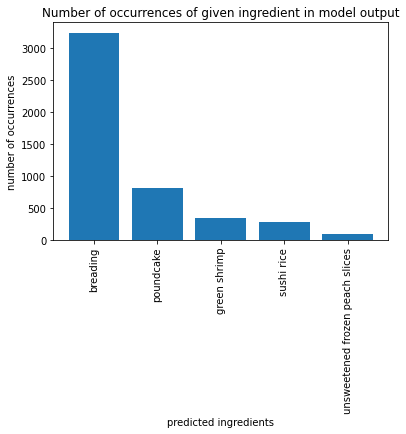

In [79]:
pred_ingr = [vocab[x][-1].replace('_'," ")  for x in test_ranks['pred'].value_counts().keys()]
pred_ingr_count = [x for x in test_ranks['pred'].value_counts()]
plt.bar(pred_ingr, pred_ingr_count)
plt.xticks(rotation=90)
plt.xlabel('predicted ingredients')
plt.ylabel('number of occurrences')
plt.title('Number of occurrences of given ingredient in model output')
plt.show()

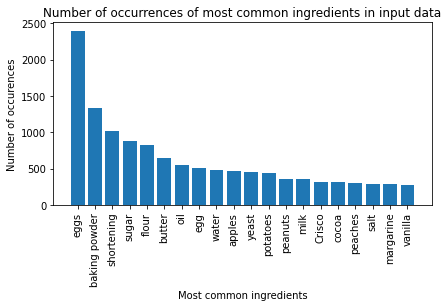

In [77]:
a = [x['subs'][1] for x in inputNer]
counter = collections.Counter(a)
x = [ingr[0] for ingr in counter.most_common()[:20]]
y = [ingr[1] for ingr in counter.most_common()[:20]]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Most common ingredients')
plt.ylabel('Number of occurences')
plt.title("Number of occurrences of most common ingredients in input data")
plt.show()